# 클러스터링
- 최적 k 찾기
- 원 핫 인코딩
- kMeans
- 고객세분화

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [4]:
from sklearn.cluster import KMeans

## 데이터 읽기

In [5]:
!curl https://raw.githubusercontent.com/ShubhankarRawat/Mall-Customers-Segmentation/master/data.csv\
    -o customer.csv
df = pd.read_csv('customer.csv')
# 다른 사이트에서 읽기
# df = pd.read_csv('https://raw.githubusercontent.com/ShubhankarRawat/Mall-Customers-Segmentation/master/data.csv')
print(df.shape)
df.head()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3780  100  3780    0     0  11250      0 --:--:-- --:--:-- --:--:-- 11250
(200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## 원 핫 인코딩
- 성별을 One Hot Encoding 

In [8]:
df = pd.get_dummies(df, columns = ['Gender'])
df[:5]

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0


(array([1, 2, 3, 4, 5, 6]),
 [Text(1, 0, 'CustomerID'),
  Text(2, 0, 'Age'),
  Text(3, 0, 'Annual Income (k$)'),
  Text(4, 0, 'Spending Score (1-100)'),
  Text(5, 0, 'Gender_Female'),
  Text(6, 0, 'Gender_Male')])

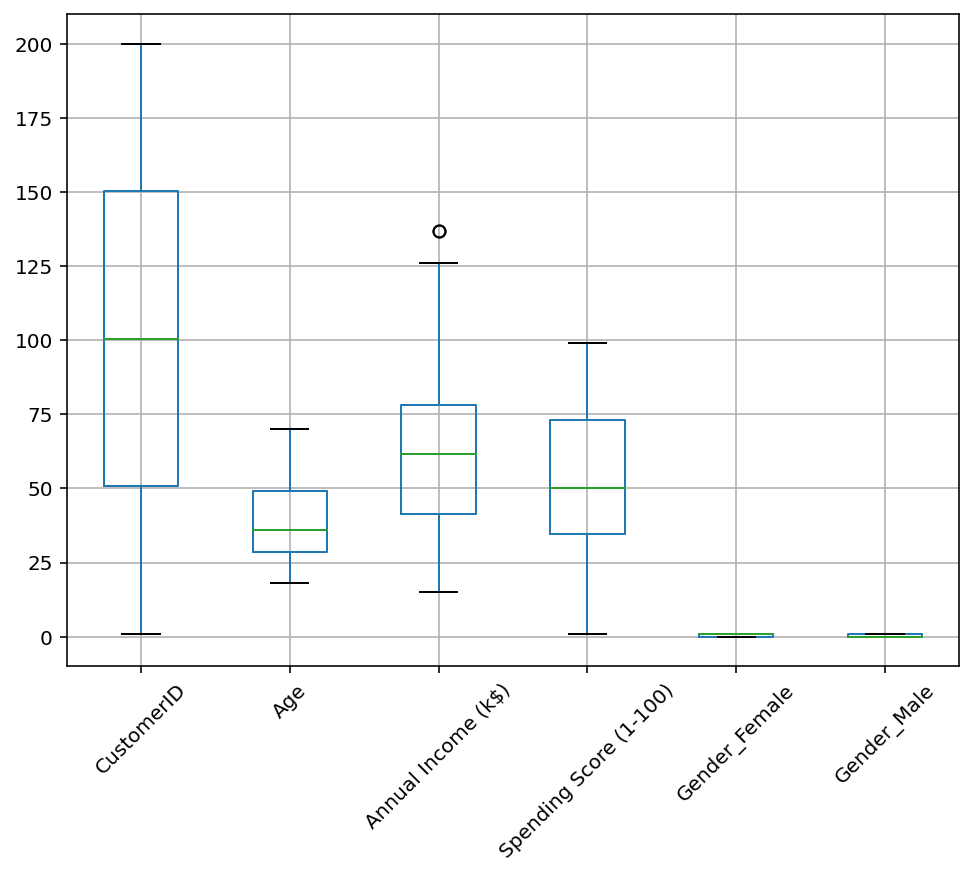

In [9]:
df.boxplot(figsize=(8,6))
plt.xticks(rotation=45)

In [10]:
df.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Gender_Female', 'Gender_Male'],
      dtype='object')

## 두 개 특성의 산포도

Text(0, 0.5, 'Spending Score (1-100)')

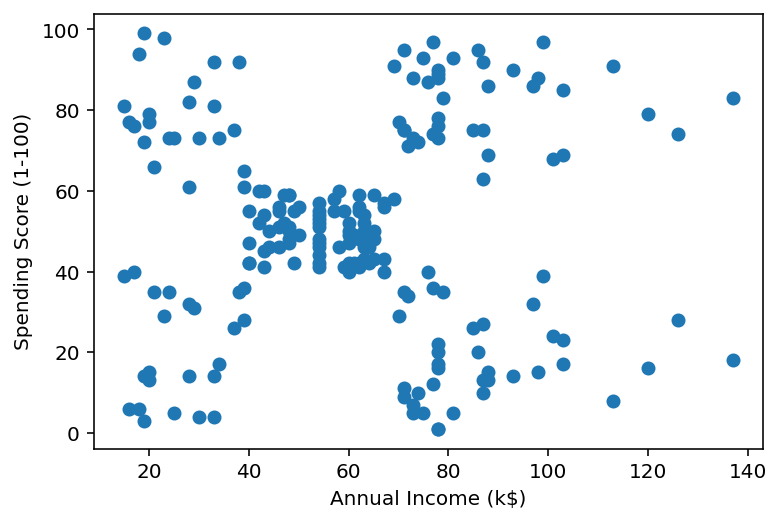

In [11]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

## 스케일링

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
continuous = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
df[continuous] = scaler.fit_transform(df[continuous])
df[:5]

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,-1.424569,-1.738999,-0.434801,0,1
1,2,-1.281035,-1.738999,1.195704,0,1
2,3,-1.352802,-1.700830,-1.715913,1,0
3,4,-1.137502,-1.700830,1.040418,1,0
4,5,-0.563369,-1.662660,-0.395980,1,0


# 최적의 클러스터 수 찾기
- 두개의 특성만 사용하는 경우: ['Annual Income (k$)', 'Spending Score (1-100)']
- mass(inertia)의 변화 보기
- 실루엣 지수 보기

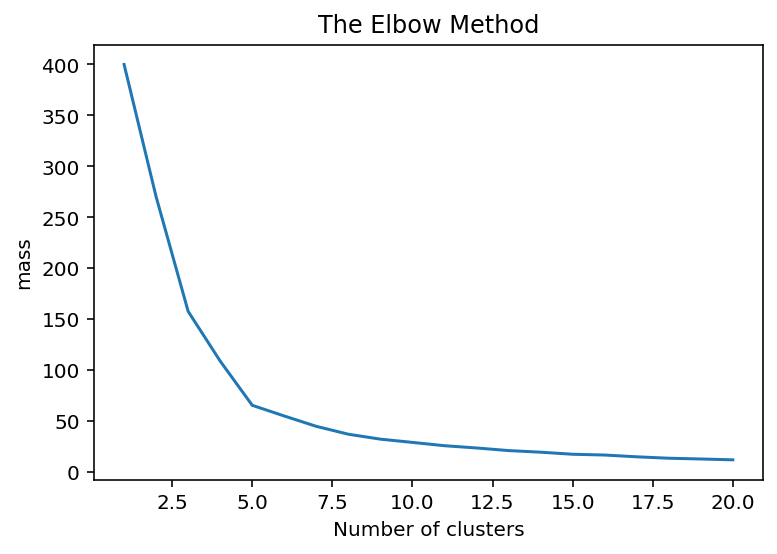

In [17]:
df2 = df[['Annual Income (k$)', 'Spending Score (1-100)']]
mass = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df2)
    mass.append(kmeans.inertia_)
plt.plot(range(1, 21), mass)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('mass')
plt.show()

In [18]:
from sklearn.metrics import silhouette_samples, silhouette_score

results = []
for c in range(2,21):
  clusterer = KMeans(n_clusters=c)
  cluster_labels = clusterer.fit_predict(df2)
  silhouette_avg = silhouette_score(df2, cluster_labels)
  results.append([c,silhouette_avg])

In [19]:
df_result = pd.DataFrame(results, columns=["n_clusters","silhouette_score"])
df_result

,n_clusters,silhouette_score
0,2,0.295121
1,3,0.466585
2,4,0.493907
3,5,0.554657
4,6,0.537714
5,7,0.528149
6,8,0.455236
7,9,0.458053
8,10,0.440728
9,11,0.438468


## 두 개의 특성만 사용
- k=5 선택

In [21]:
kmeans = KMeans(n_clusters = 5)
y_kmeans = kmeans.fit_predict(df2)
y_kmeans[:20]

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4],
      dtype=int32)

In [22]:
kmeans.labels_[:20]

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4],
      dtype=int32)

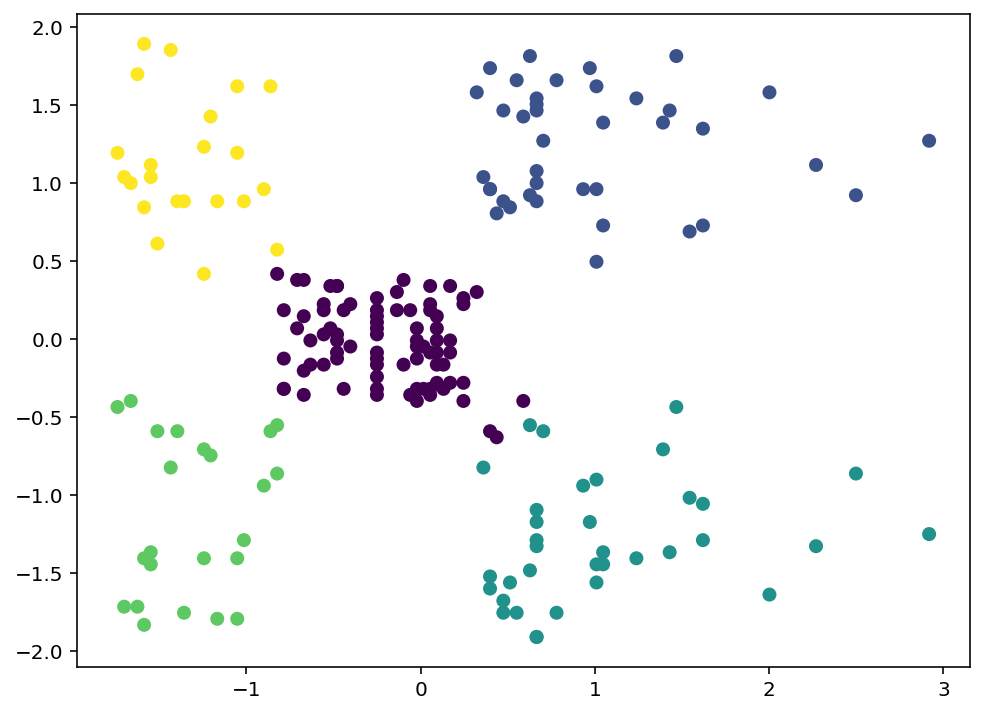

In [23]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=y_kmeans)

In [24]:
# 임의의 샘플값의 가까운 클러스터 예측하기
kmeans.predict([[0.9,-0.4],[-0.7,0.8]])

array([2, 4], dtype=int32)

In [25]:
df["cluster"] = y_kmeans
df.head(5)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,cluster
0,1,-1.424569,-1.738999,-0.434801,0,1,3
1,2,-1.281035,-1.738999,1.195704,0,1,4
2,3,-1.352802,-1.700830,-1.715913,1,0,3
3,4,-1.137502,-1.700830,1.040418,1,0,4
4,5,-0.563369,-1.662660,-0.395980,1,0,3


In [26]:
df_backup = df.copy()
df = df.drop(['CustomerID','cluster'], axis=1, errors='ignore')
df[:3]

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,-1.424569,-1.738999,-0.434801,0,1
1,-1.281035,-1.738999,1.195704,0,1
2,-1.352802,-1.700830,-1.715913,1,0


# (과제)
- 2개의 변수만 사용했다. 이를 5개 변수(성별,남, 여)를 모두 사용하는 클러스터링 수행
 - 'Annual Income (k$)', 'Spending Score (1-100)' 축으로 산포도 그리기
 - PCA(2) 축에서 산포도 그리기
 - 'Age', 'Spending Score (1-100)' 축으로 산포도 그리기

## 모든 특성 사용한 클러스터링

- 최적의 k값 찾기
- mass(inertia), 실루엣 지수 검토

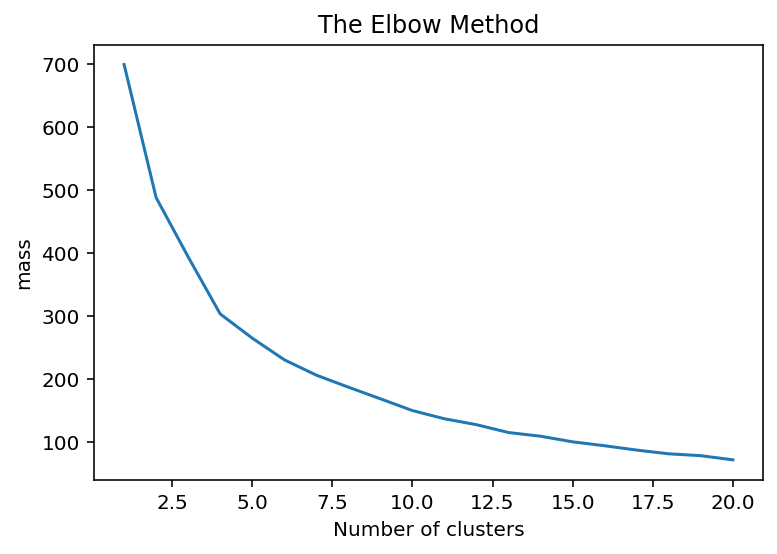

In [28]:
mass = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df)
    mass.append(kmeans.inertia_)
plt.plot(range(1, 21), mass)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('mass')
plt.show()

In [29]:
results = []
for c in range(2,21):
  clusterer = KMeans(n_clusters=c)
  cluster_labels = clusterer.fit_predict(df)
  silhouette_avg = silhouette_score(df, cluster_labels)
  results.append([c,silhouette_avg])

In [30]:
pd.DataFrame(results, columns=["n_clusters","silhouette_score"])

,n_clusters,silhouette_score
0,2,0.282065
1,3,0.285931
2,4,0.319470
3,5,0.315256
4,6,0.309922
5,7,0.320547
6,8,0.328145
7,9,0.341048
8,10,0.360166
9,11,0.368024


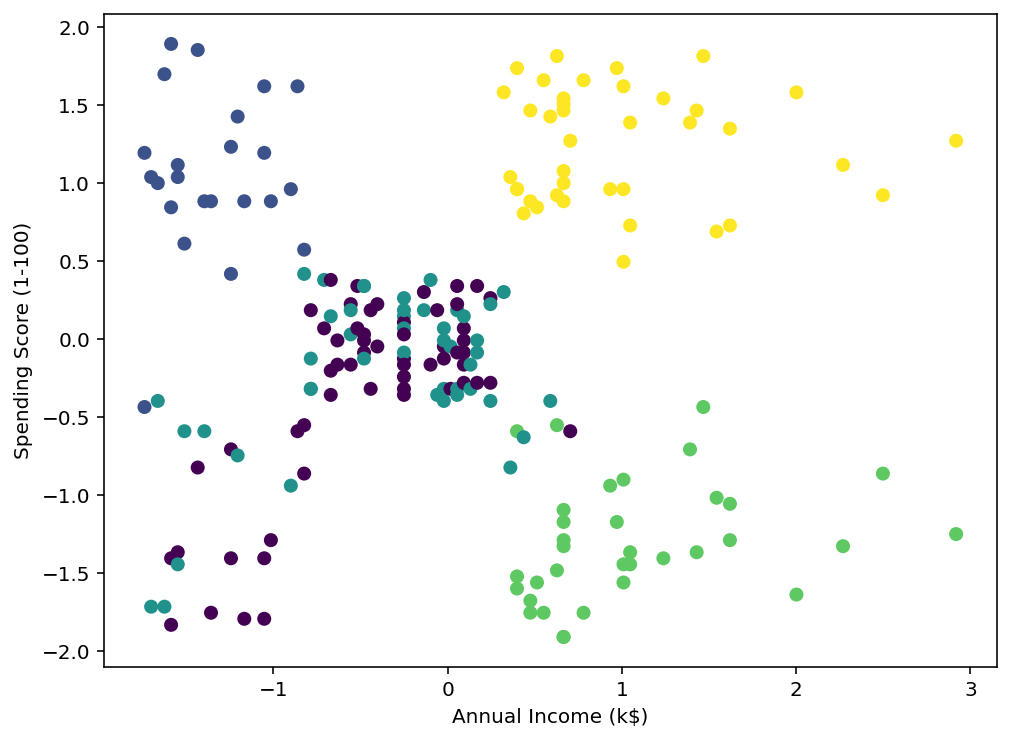

In [31]:
kmeans = KMeans(n_clusters = 5)
y_kmeans = kmeans.fit_predict(df)
plt.figure(figsize=(8, 6))
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], 
                    c=y_kmeans)   

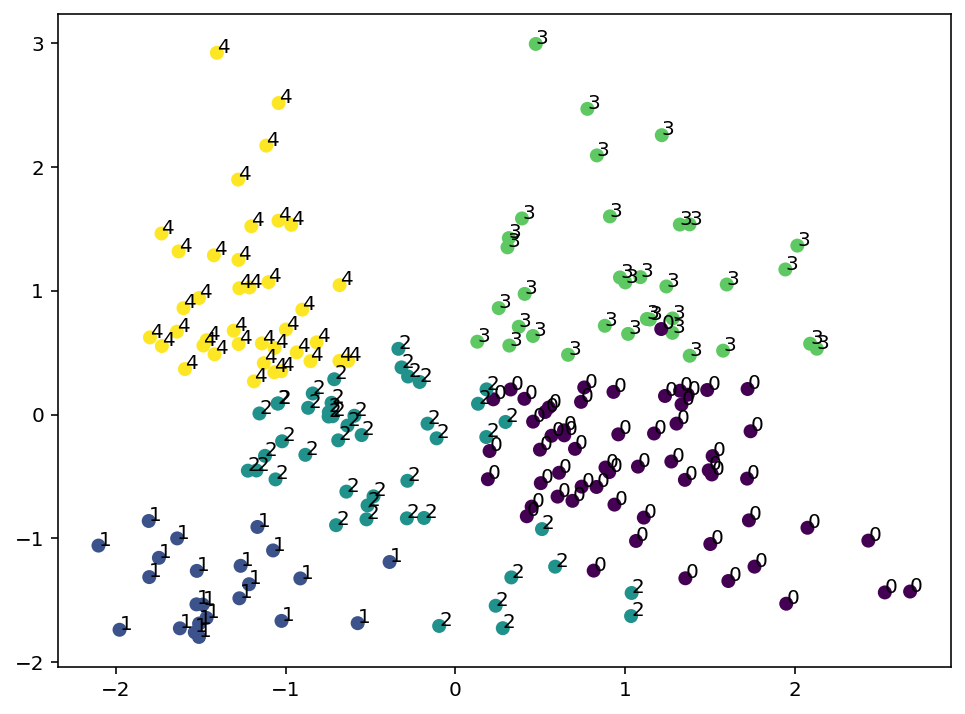

In [32]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=2)
X_pca2 = pca.fit_transform(df)
plt.figure(figsize=(8,6))
plt.scatter(X_pca2[:,0],X_pca2[:,1], c=y_kmeans)

for n in range(df.shape[0]):
    plt.text(X_pca2[:,0][n], X_pca2[:,1][n], y_kmeans[n])

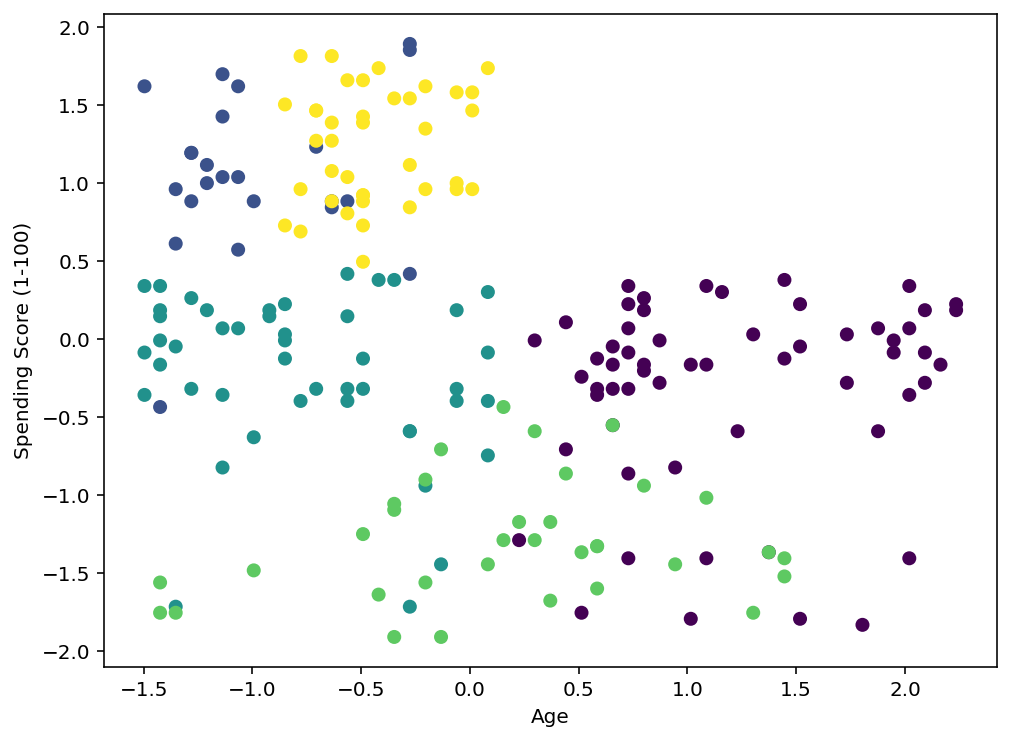

In [35]:
plt.figure(figsize=(8, 6))
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.scatter(df['Age'], df['Spending Score (1-100)'], 
                    c=y_kmeans) 